In [102]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [103]:
df=pd.read_csv("Desktop/Data/manufacturing_defect_dataset.csv",sep=",",encoding="latin1")
df

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,762,11325.689263,89.252385,2,2.667570,87.141681,16,0.987719,3.574419,0.065727,95.917264,3,3288.043242,0.420186,4.733399,299.829577,0
3236,335,5598.837988,95.701437,4,0.751272,95.562997,11,0.178163,8.295295,0.097698,87.780846,8,2761.301593,0.126441,7.234421,245.524560,0
3237,835,11736.177712,96.431554,5,4.899756,77.973442,0,4.873429,3.844824,0.005724,81.590143,5,2000.621648,0.325530,5.436538,206.490010,1
3238,302,13664.196210,91.089782,1,4.057665,95.755591,6,0.071663,2.783298,0.042612,88.488525,6,1534.792169,0.222736,3.776924,203.771655,0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductionVolume      3240 non-null   int64  
 1   ProductionCost        3240 non-null   float64
 2   SupplierQuality       3240 non-null   float64
 3   DeliveryDelay         3240 non-null   int64  
 4   DefectRate            3240 non-null   float64
 5   QualityScore          3240 non-null   float64
 6   MaintenanceHours      3240 non-null   int64  
 7   DowntimePercentage    3240 non-null   float64
 8   InventoryTurnover     3240 non-null   float64
 9   StockoutRate          3240 non-null   float64
 10  WorkerProductivity    3240 non-null   float64
 11  SafetyIncidents       3240 non-null   int64  
 12  EnergyConsumption     3240 non-null   float64
 13  EnergyEfficiency      3240 non-null   float64
 14  AdditiveProcessTime   3240 non-null   float64
 15  AdditiveMaterialCost 

In [105]:
df.isnull().sum()

ProductionVolume        0
ProductionCost          0
SupplierQuality         0
DeliveryDelay           0
DefectRate              0
QualityScore            0
MaintenanceHours        0
DowntimePercentage      0
InventoryTurnover       0
StockoutRate            0
WorkerProductivity      0
SafetyIncidents         0
EnergyConsumption       0
EnergyEfficiency        0
AdditiveProcessTime     0
AdditiveMaterialCost    0
DefectStatus            0
dtype: int64

### there isn't null values

In [107]:
df.duplicated().sum()

0

### there is no duplictes

<Axes: >

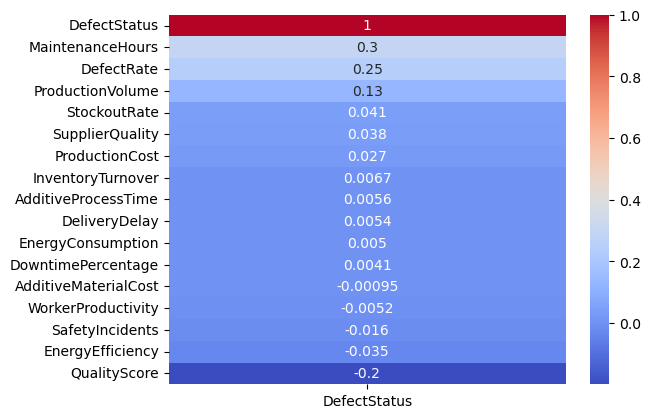

In [109]:
target_column = 'DefectStatus'

corr_matrix = df.corr()

target_corr = corr_matrix[[target_column]].sort_values(by=target_column, ascending=False)

sns.heatmap(target_corr, annot=True, cmap='coolwarm')

### with this heat map we can see that the most 4 things that have effects on the defect stauts is [Maintenance Hours,Production Volume,Defect Rate]
### and the qualtiy score with negtive effect and that can be understand

<Axes: >

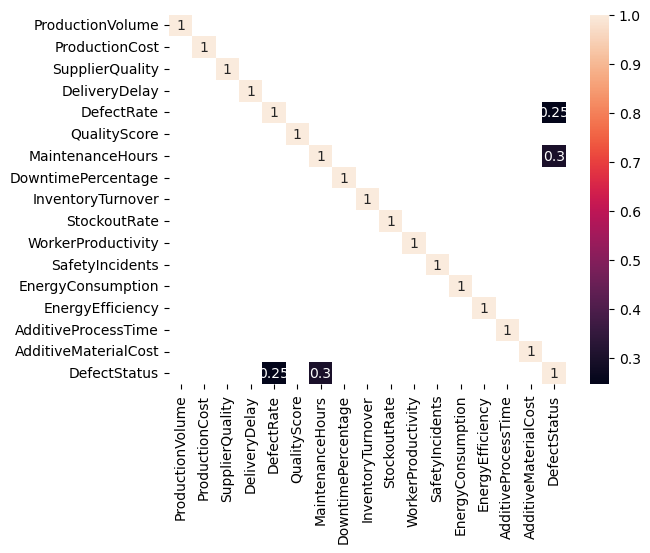

In [111]:
corr_matrix=df.corr()

feature_corr=corr_matrix[corr_matrix>0.2]

sns.heatmap(feature_corr,annot=True)

### there is no realstion between any of two features 

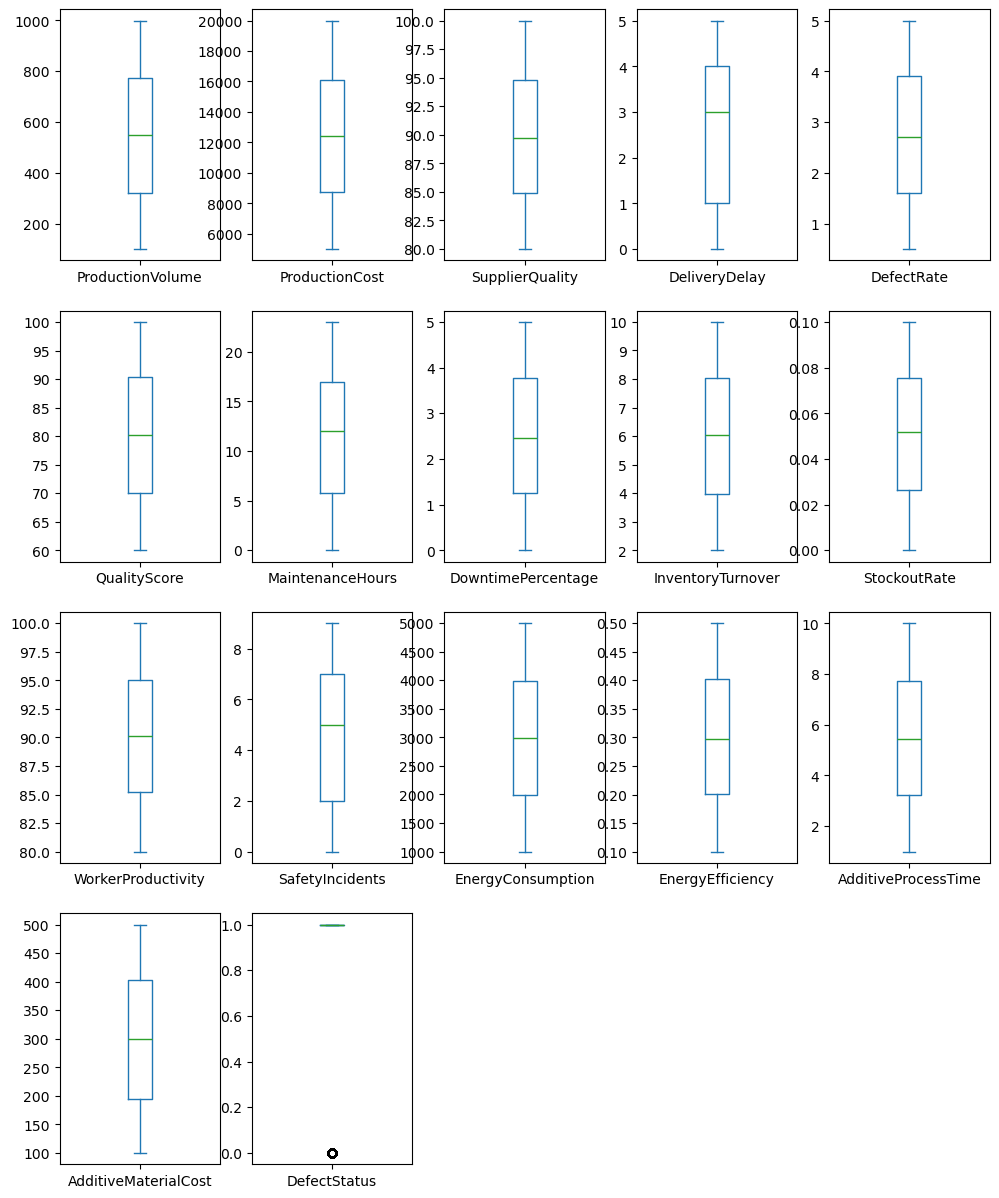

In [113]:
df.plot(kind="box",subplots=True,figsize=(12,15),layout=(4,5))
plt.show()

### there is no outliares

<Axes: xlabel='DefectStatus'>

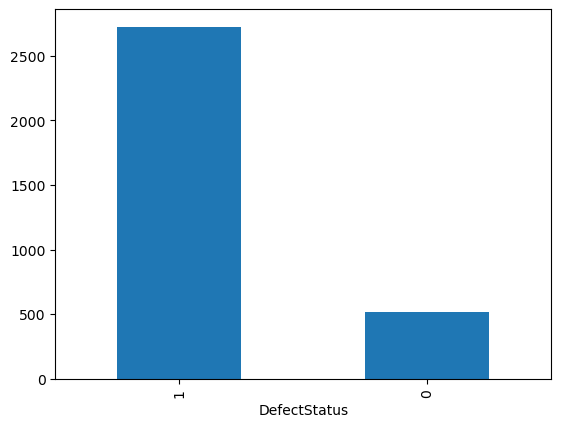

In [115]:
df['DefectStatus'].value_counts().plot(kind="bar")

In [116]:
X = df.drop('DefectStatus', axis=1)
y = df['DefectStatus']

In [117]:
smote = SMOTE(random_state=42,sampling_strategy=0.4,k_neighbors=7)
X_resampled, y_resampled = smote.fit_resample(X, y)

<Axes: xlabel='DefectStatus'>

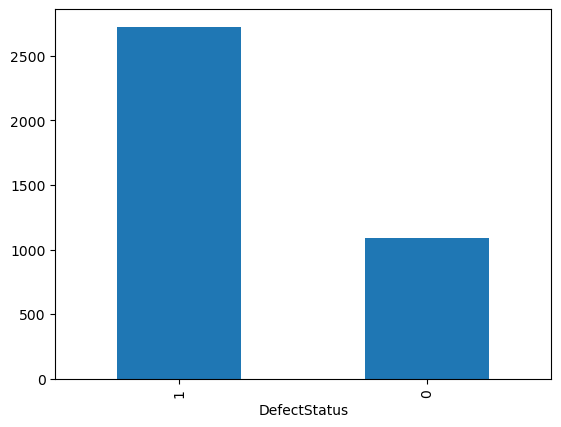

In [118]:
y_resampled.value_counts().plot(kind="bar")

In [76]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan', weights='distance')
classifier.fit(X_resampled, y_resampled)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [77]:
pipeline = Pipeline([
    ('smote', SMOTE()),  # Apply SMOTE
    ('knn', KNeighborsClassifier())  # KNN Classifier
])

param_grid = {
    'knn__n_neighbors': [3, 5, 7], 
    'knn__weights': ['uniform', 'distance'],  
    'knn__metric': ['euclidean', 'manhattan'] 
}

#
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_resampled, y_resampled)


print("Best parameters found:", grid_search.best_params_)
score = grid_search.score(X_resampled, y_resampled)  
print(f"KNN Classifier F1 Macro Score: {score:.4f}")

Best parameters found: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
KNN Classifier F1 Macro Score: 1.0000


<Axes: xlabel='DefectStatus'>

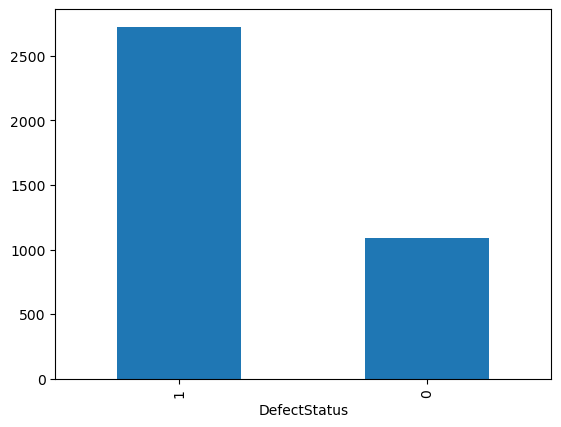

In [79]:
y_resampled.value_counts().plot(kind="bar")

In [80]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [131]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
param_grid_xgb = {
    'n_estimators': [50,100,200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10]
}

In [133]:
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb,scoring='f1')
grid_search_xgb.fit(x_train, y_train)
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Score:", grid_search_xgb.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200}
Best Score: 0.9604868894028975
